# Análisis de caminatas aleatorias

Una tarea fundamental en la física es el análisis de datos. 
A menudo, un experimento produce una cierta cantidad de datos correspondientes a la medición de ciertas cantidades. Se repite una medición varias veces para asegurar que sea reproducible, y luego se llevan a cabo análisis de estos datos.

Podemos llevar a cabo el mismo proceso con los datos provenientes de un **experimento numérico**, o sea, una simulación.

Retomemos nuestra simulación de caminatas aleatorias del notebook 1 y recordemos algo de estadística para poder caracterizar a las caminatas (y para finalmente entender la estadística...).

## Datos

Pensemos en una caminata aleatoria como el experimento. Al repetir varias veces la caminata, saldrán datos diferentes. ¿Cómo podemos caracterizar estos datos?

#### Ejercicio 1

(i) Escribe una función `caminatas` para simular la dinámica de $N$ caminatas aleatorias para un tiempo total $T$. Sigue los pasos siguientes.

1. Crea un vector llamado `xs` de enteros ceros de longitud $N$ con la función `zeros`. [Pista: Utiliza `?zeros` para ver la documentación de la función.]


2. Haz una función `paso!` que acepte como argumentos `xs` e `i` y lleva a cabo un paso del caminante número $i$. [Puedes acceder a la entrada número `i` del vector `xs` con `xs[i]`.]


3. Haz una función `paso!` (mismo nombre) que acepte sólo el argumento `xs` y lleva a cabo un paso de todos los caminantes.
[Pista: La función `length` nos dice cuántos elementos contiene un `Vector`.]


4. Haz la función `caminatas`. Guarda el vector de `xs` en cada paso en un vector nuevo `posiciones`. Tendrás que utilizar la función `copy` para copiar `xs`. (¿Qué ocurre si no lo haces?)
La función regresa todos los datos.


(ii) Simula 1000 caminantes para un tiempo 100 y capta la salida de la función en una variable `posiciones`.

In [13]:
#1)
n=10#el numero de caminantes fijado por mi
xs=zeros(Int64, n)#creamos el vector con el numero ceminantes antes dado
print(xs)

[0

In [14]:
#2)
function paso!(v,i)#funcion que tiene como parametro al caminante i-esimo
    r=rand(Bool)
    s=Int(r)
        if s==false
            D=-1
        elseif s==true
            D=1
        end  #hacemos el paso aleatorio
    v[i]=v[i]+D #hacemos el paso al caminante i-esimo
end
paso!(xs,3)#llamamos a la funcion
@show xs

, 0, 0, 0, 0, 0, 0, 0, 0, 0]

10-element Array{Int64,1}:
  0
  0
 -1
  0
  0
  0
  0
  0
  0
  0

xs = [0, 0, -1, 0, 0, 0, 0, 0, 0, 0]


In [15]:
#3)
function paso()
    r=rand(Bool)
    s=Int(r)
        if s==false
            D=-1
        elseif s==true
            D=1
        end #para mayyor comodidad lo dividimos en 2 funciones
end
function paso!(v)#aqui i ya no es un parametro pues se aplica a todos lo caminantes
    for i in 1:length(v)
        u=paso()
        v[i]=v[i]+u #todo el vector ha sido modificado
    end
    return v
end
paso!(zeros(6))

6-element Array{Float64,1}:
 -1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0

In [78]:
#4)
function caminata(x)
    s=3
posiciones=zeros(Int64,s,length(x))#definimos nuestra variable posiciones como una 
    for i in 1:s          #matrix y asi cada cambia del vector pueda ser guardado
        y=paso()
        x[i]=x[i]+y
        posiciones[i,:]=copy(x)#si no se ocupa la funcion copy() y solo asignamos el valor del vector 
    end
    @show posiciones #a la variable "posiciones" esta solo obtendra modificaciones en el utltimo renglon
end
caminata(zeros(3))

3×3 Array{Int64,2}:
 -1   0  0
 -1  -1  0
 -1  -1  1

posiciones = [-1 0 0; -1 -1 0; -1 -1 1]


In [79]:
#2

function caminatas(v,T)
    posiciones=[]
    for i in 1:T
      xs2=copy(v)
      push!(posiciones,xs2)
      v=paso!(v)
    end
    return posiciones
end

caminatas (generic function with 2 methods)

In [80]:
posiciones=caminatas(zeros(1000),100)


100-element Array{Any,1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                       
 [1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0  …  1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0]               
 [2.0, 0.0, 2.0, -2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0  …  0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 0.0, -2.0, 0.0]                     
 [1.0, 1.0, 3.0, -1.0, 3.0, -1.0, 1.0, 3.0, 1.0, 3.0  …  1.0, -1.0, 1.0, 3.0, 1.0, 3.0, 3.0, -1.0, -3.0, -1.0]                 
 [0.0, 2.0, 4.0, 0.0, 4.0, -2.0, 2.0, 2.0, 0.0, 2.0  …  2.0, -2.0, 0.0, 4.0, 0.0, 4.0, 2.0, -2.0, -2.0, 0.0]                   
 [1.0, 1.0, 3.0, -1.0, 3.0, -3.0, 3.0, 1.0, -1.0, 3.0  …  3.0, -1.0, -1.0, 5.0, -1.0, 5.0, 1.0, -1.0, -1.0, 1.0]               
 [0.0, 2.0, 4.0, -2.0, 4.0, -4.0, 4.0, 0.0, 0.0, 4.0  …  4.0, 0.0, -2.0, 6.0, 0.0, 6.0, 2.0, -2.0, 0.0, 2.0]                   
 [1.0, 3.0, 5.0, -3.0, 3.0, -3.0, 5.0, -1.0, -1.0, 3.0  …  5.0, -1.0, -3.0, 5.

## Promedios

La primera cosa que se nos debe ocurrir es sacar el **promedio** de los datos. Podemos pensar en calcular el promedio en cada tiempo.

#### Ejercicio 2

(i) Si simulas $N$ caminatas aleatorias $x_i(t)$, con $i=1, \ldots, N$, para un tiempo total (número de pasos) $T$, ¿cómo esperas salga el promedio de todos los $x_i(t)$ con un tiempo $t$ fijo?

***no pues al sólo tener dos opciones (izq o der) la probabilidad es igual***

(ii) Escribe una función `promedio` que calcule el promedio de un vector. Acepta el vector `v` como argumento y regresa el promedio.

(iii) Escribe una función `promedios` que calcula los promedios de $x_i(t)$ para cada $t$. 

(iv) Calcula los promedios de 1000 caminantes por un tiempo 100. 

(v) Dibuja el promedio como función del tiempo. ¿Es lo que esperabas?

In [81]:
#ii
function promedio(v)
suma=0
l=length(v)
    for i in 1:l
        suma=suma+v[i]
    end
    p=suma/l
    return p
end
promedio(posiciones)

1000-element Array{Float64,1}:
 -10.18
  13.14
  -5.24
  -5.12
   2.0 
 -15.84
  -1.98
   2.74
  -4.76
   0.3 
   2.94
  -4.22
  -2.58
   ⋮   
 -13.58
  -0.12
  -5.12
   7.56
   2.86
  13.14
   4.74
  11.3 
  -2.0 
  -9.24
   5.02
  -3.6 

In [82]:
#iii
function promedios(posiciones)
    return [promedio(posiciones[i]) for i in 1:length(posiciones)]
end

promedios (generic function with 1 method)

In [83]:
#iv)
promi=zeros(100)
promi=promedios(caminatas(zeros(1000),100))

100-element Array{Float64,1}:
  0.0  
  0.004
 -0.022
 -0.012
 -0.02 
 -0.006
  0.012
 -0.04 
 -0.004
 -0.072
 -0.038
 -0.06 
 -0.052
  ⋮    
 -0.436
 -0.444
 -0.384
 -0.384
 -0.438
 -0.476
 -0.496
 -0.488
 -0.464
 -0.46 
 -0.462
 -0.478

In [84]:
d=99 #el promedio de los caminantes al tiempo d
print(promi[d])

-0.462

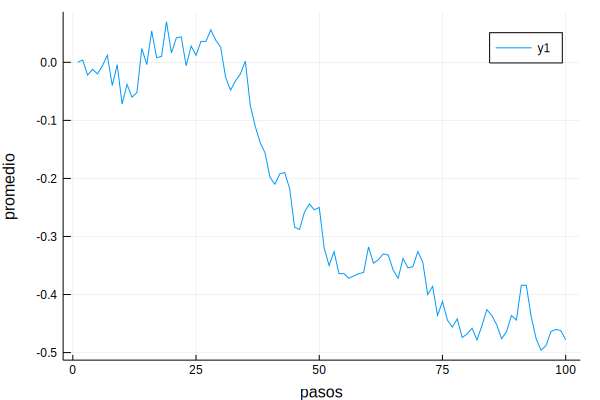

In [85]:
#v
using Plots
plot(promi)
xlabel!("pasos")
ylabel!("promedio")

In [86]:
#podemos comprobarlo pidiendo el promedio del paso i esimo
print(promi[50])# si observamos la grafica en t=50 el promedio es aprox. 
# y piediendo ese dato si lo es

-0.25

## Estadística 

Ya hemos recordado la primera cantidad estadística fundamental, el promedio, y vimos que no nos dio información tan valiosa. ¿Cuál es la siguiente cantidad importante?

#### Ejercicio 3

(i) Escribe una función `varianza` que calcule la varianza de un vector `v`.

(ii) Escribe una función que calcule las varianzas de las $x_i(t)$ para una $t$ dada.

(iii) Dibuja la varianza como función del tiempo. Repite el cálculo varias veces y dibuja las distintas curvas en una sola gráfica. ¿Qué observas? ¿Cómo crece la varianza?

(iv) Haz lo mismo para la desviación estándar.

In [151]:
#(i)
function varianza(v)
    
    n = length(v)
    prom = promedio(v)
    
    suma = 0
    
    for i in 1:n
        t = (v[i]-prom)^2
        suma = suma + t
    end
        
    return suma/n
end


varianza (generic function with 1 method)

In [152]:
#ii
function varianzas(posiciones)
        return [varianza(posiciones[i]) for i in 1:length(posiciones)]
end 

varianzas (generic function with 2 methods)

In [153]:
vari=zeros(100,5)
for i in 1:5
vari[:,i]=varianzas(caminatas(zeros(1000),100))
end


In [154]:
vari

100×5 Array{Float64,2}:
  0.0        0.0         0.0         0.0         0.0     
  0.999516   0.999936    0.999856    0.999856    0.998556
  1.95922    1.9871      2.02886     1.9375      1.89452 
  2.88786    2.98224     3.0016      3.03084     2.76894 
  3.81952    3.96368     3.9456      3.90738     4.06746 
  4.83884    4.7511      4.98816     5.0775      5.12678 
  5.7718     5.55538     6.014       5.8256      6.2679  
  6.77574    6.51954     7.4871      7.0239      7.38278 
  7.6598     7.76754     8.2716      8.22588     8.28338 
  8.70108    8.8399      9.38802     9.04588     9.43006 
  9.4511    10.0603     10.7279      9.86374    10.5756  
 10.7021    11.4181     11.5811     10.9179     11.5277  
 11.8355    12.5224     12.9031     12.1337     12.3788  
  ⋮                                                      
 84.7431    84.3593     86.9182     96.1052     89.6453  
 85.4659    85.3968     87.5816     96.8567     92.7545  
 86.0544    86.5423     89.8351     98.71       

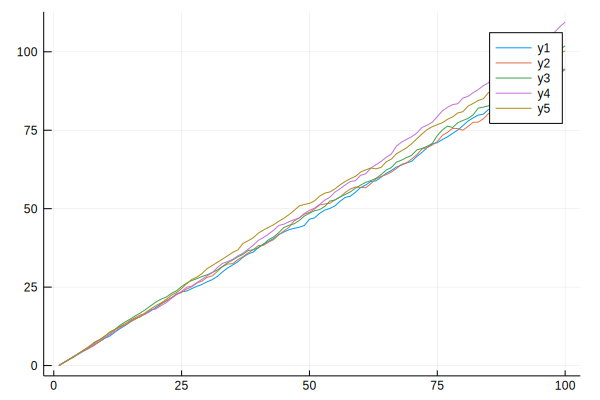

In [155]:
#iii)
plot(vari[:,1])
plot!(vari[:,2])
plot!(vari[:,3])
plot!(vari[:,4])
plot!(vari[:,5])


In [159]:
#iv hacer lo mismo para la desviacion estandar
  #la desvicion estadar e sla raiz de la varianza
function desviacion(v)
    return sqrt(varianza(v))
end
desviacion(posiciones[55])#ejemplo para corroborar con el resultado sacado arriba

7.589440032044518

In [160]:
function desviaciones(posiciones)
    return[desviacion(posiciones[i] ) for i in 1:length(posiciones)]
end 


desviaciones (generic function with 1 method)

In [161]:
desvi=zeros(100,5)
for i in 1:5
   desvi[:,i]=desviaciones(caminatas(zeros(1000),100))#varianza al tiempo t=40
end



In [162]:
desvi

100×5 Array{Float64,2}:
  0.0       0.0       0.0        0.0      0.0     
  0.999928  0.999928  0.999968   0.99995  0.999928
  1.43652   1.41794   1.40834    1.39888  1.41229 
  1.70171   1.71286   1.73665    1.71035  1.73943 
  1.99399   2.00731   1.94521    1.96374  1.9851  
  2.31517   2.25481   2.17023    2.24638  2.15465 
  2.51232   2.50125   2.37951    2.48188  2.34928 
  2.68599   2.6827    2.52082    2.69657  2.57038 
  2.86964   2.86564   2.72637    2.88235  2.73937 
  3.0996    3.06847   2.8758     3.04492  2.87615 
  3.23038   3.21738   3.05655    3.23787  3.03489 
  3.43278   3.42499   3.19399    3.45253  3.19147 
  3.62381   3.54353   3.33165    3.61595  3.33493 
  ⋮                                               
  9.32823   8.89915   9.12851    9.61246  9.15735 
  9.4153    8.9997    9.11466    9.73898  9.17694 
  9.47009   9.09411   9.14522    9.81488  9.2864  
  9.51209   9.08395   9.19886    9.84417  9.284   
  9.59255   9.16775   9.26739    9.85357  9.34174 
  9.607

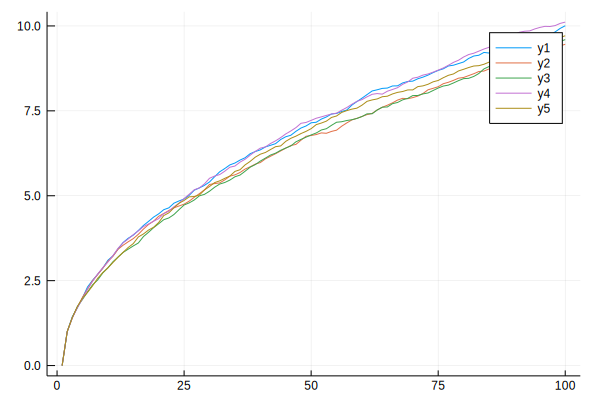

In [163]:
plot(desvi[:,1])
plot!(desvi[:,2])
plot!(desvi[:,3])
plot!(desvi[:,4])
plot!(desvi[:,5])

### Densidad de probabilidad

El promedio y la varianza son medidas burdas que caracterizan a una colección de datos. Una medida más refinada es la **distribución de probabilidad**. Una forma de caracterizarla es a través de un **histograma**, que nos proporciona la **densidad de probabilidad** o densidad de masa.

#### Ejercicio 4

(i) ¿Qué es lo que mide un histograma?

***mide la distribucion de frecuecnias de un conjunto de datos, i.e. cuales son mas preferidos por las variables***

(ii) `Plots.jl` contiene una función `histograma`. Busca documentación y/o ejemplos del uso de esta función para dibujar, en una sola gráfica, algunos histogramas normalizados correspondientes a algunos tiempos $t$.

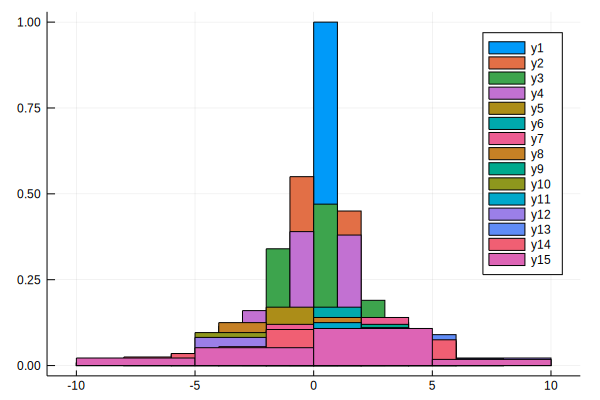

In [177]:
#ii
histogram(caminatas(zeros(100),15),normalize=true, legend=true)

## Caminatas con sesgo

Las caminatas hasta ahora han brincado con la misma probabilidad a la izquierda y a la derecha. Ahora vamos a relajar esta restricción.

#### Ejercicio 5

(i) Simula $N = 1000$ números aleatorios entre $0$ y $1$ con la función `rand`.

(ii) Calcula la fracción de los números que salgan menores que 0.1, menores que 0.2, menores que 0.3, etc, es decir, la **probabilidad** de que salgan menores que 0.1 etc. ¿Qué observas?

***observamos que la probabilidad de obtener un numero decimal menor a 1 es la misma que este numero***

(iii) Así, escribe una función `mi_rand` que acepte un valor $0 \le p \le 1$ y genere `true` con probabilidad $p$, y `false` con probabilidad $1-p$. Para hacerlo, podrás hacer uso de un **condicional**, con la sintaxis esquemática

    if *condición*
        *haz algo*
    else
        *haz otra cosa*
    end
    

In [193]:
#i
n=1000
S=zeros(n)
S=rand(n)
println(S)

[0.437679, 0.843112, 0.00212354, 0.202862, 0.290237, 0.752972, 0.833489, 0.543621, 0.255514, 0.664351, 0.953562, 0.866047, 0.621848, 0.394154, 0.631603, 0.432417, 0.503628, 0.32759, 0.991859, 0.506554, 0.660671, 0.95425, 0.591847, 0.612741, 0.30789, 0.716094, 0.682441, 0.232398, 0.0953662, 0.289802, 0.689789, 0.13123, 0.753814, 0.992081, 0.0157316, 0.815326, 0.462656, 0.704827, 0.0120637, 0.976864, 0.930125, 0.232589, 0.6981, 0.923295, 0.0395563, 0.949681, 0.585553, 0.650887, 0.175409, 0.969586, 0.0337299, 0.210819, 0.0379469, 0.904344, 0.276376, 0.385223, 0.0489042, 0.273267, 0.520423, 0.167075, 0.131644, 0.902717, 0.536185, 0.178344, 0.633411, 0.715726, 0.0829073, 0.605011, 0.57824, 0.00632139, 0.350386, 0.206402, 0.0251, 0.447583, 0.401914, 0.723313, 0.740802, 0.830454, 0.227549, 0.141055, 0.840366, 0.0148946, 0.256142, 0.568553, 0.822129, 0.495795, 0.906318, 0.258565, 0.923495, 0.162268, 0.868241, 0.664201, 0.0740008, 0.492374, 0.40889, 0.504107, 0.728583, 0.419361, 0.801763, 0.917

In [196]:
#ii
function probabilidad(p)
    r=0
    j=length(S)
    for i in 1:j
       if S[i] <p
            r +=1
        end
    end
    return r/j
end

probabilidad (generic function with 1 method)

In [206]:
for i in 0:0.1:1 
    println(probabilidad(i))
end

0.0
0.11
0.191
0.309
0.399
0.503
0.608
0.705
0.804
0.896
1.0


In [207]:
a=rand()

0.052889120000127576

In [212]:
#iii
function mi_rand(p)
s=rand()
    if (p>=0 && p<=1)
        if s<=p
            a=true
        else
            a=false
        end
    else
        a="la cagaste we"
    end
    return a
end

mi_rand (generic function with 1 method)

In [215]:
for i in 1:20
    println(mi_rand(0.9))
end

true
true
true
true
true
true
false
true
true
true
true
false
true
true
true
true
true
true
true
true


#### Ejercicio 6

(i) Dibuja una nube de trayectorias para distintos valores de $p$. Cada nube debe ir en una sola gráfica; las nubes con distintos valores de $p$ van en gráficas por separado.

Para hacerlo, haz un bucle sobre valores de $p$.

¿Qué observas?

(ii) Repite las preguntas 2, 3 y 4 para caminantes que brincan con probabilidad $p$ a la izquierda y $q = 1-p$ a la derecha. ¿Qué observas?

In [236]:
a=mi_rand(0.6)


false

In [246]:
b=Int(a)#aprendiedo a convertir a enteros las variables logicas

0

In [244]:
#i
function caminatasdeprob(n, p)
    d = 0 #la distancia que nos debemos moveer, -1 izq 1-der
    pos = []
    for i in 1:n
        a = mi_rand(p) # llamamos a la funcion crada para que nos cree un true
        b= Int(a) #nos conviertes las vatiables logicas en enteros 
        D = (-1)^b #con true nos da un un-1 nos movemos a la izq     
        d = d + D 
        push!(pos, d) 
    end
       return pos #regresamos el array
end

caminatasdeprob (generic function with 1 method)

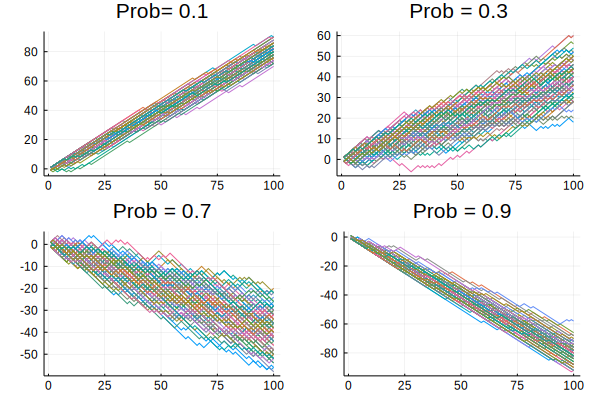

In [245]:
p1=plot(leg=false)
for i in 1:100
    p1 = plot!(caminatasdeprob(100,0.1), title="Prob= 0.1")
end

p2=plot(leg=false)
for i in 1:100
    p2 = plot!(caminatasdeprob(100,0.3), title="Prob = 0.3")
end

p3=plot(leg=false)
for i in 1:100
    p3 = plot!(caminatasdeprob(100,0.7), title="Prob = 0.7")
end

p4=plot(leg=false)
for i in 1:100
    p4 = plot!(caminatasdeprob(100,0.9), title="Prob = 0.9")
end

plot(p1,p2,p3,p4)


In [247]:
#ii Repetir 2,3, y4
#2 i

function pasop!(v,p)#aqui i ya no es un parametro pues se aplica a todos lo caminantes
    for i in 1:length(v)
        a = mi_rand(p) # llamamos a la funcion crada para que nos cree un true
        b= Int(a) #nos conviertes las vatiables logicas en enteros 
        D = (-1)^b #con true nos da un un-1 nos movemos a la izq     
        v[i]=v[i]+D #todo el vector ha sido modificado
    end
    return v
end

pasop! (generic function with 1 method)

In [250]:
#i
function caminatasp(v,T,p)
    posiciones=[]
    for i in 1:T
      xs2=copy(v)
      push!(posiciones,xs2)
      v=pasop!(v,p)
    end
    return posiciones
end

caminatasp (generic function with 1 method)

In [259]:
#iv
promedios(caminatasp(zeros(1000), 100, 0.1))#promedio de 1000 caminantes en un tiempo de 100

100-element Array{Float64,1}:
  0.0  
  0.83 
  1.652
  2.458
  3.28 
  4.072
  4.854
  5.66 
  6.454
  7.26 
  8.054
  8.838
  9.646
  ⋮    
 70.484
 71.284
 72.094
 72.908
 73.71 
 74.524
 75.344
 76.128
 76.936
 77.73 
 78.532
 79.31 

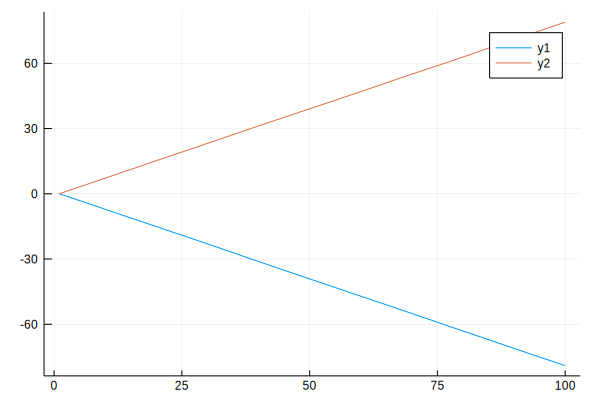

In [262]:
#v
plot(promedios(caminatasp(zeros(1000), 100, 0.9)))
plot!(promedios(caminatasp(zeros(1000), 100, 0.1)))
#vemos los extremos de las probabilidades y vemos que conp=0.9 tiende a ir 
#hacia la iz y con p=0.1 hacia la derecha

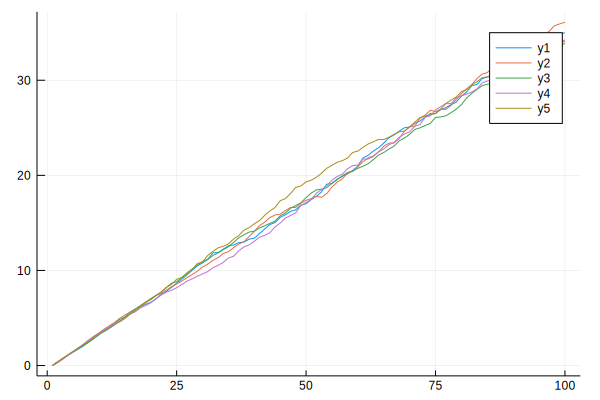

In [272]:
#3
#iii dibujar la varianza como funcion en tiempo real
vari=zeros(100,5)
for i in 1:5
vari[:,i]=varianzas(caminatasp(zeros(1000),100,0.1))
end
plot(vari[:,1])
plot!(vari[:,2])
plot!(vari[:,3])
plot!(vari[:,4])
plot!(vari[:,5])
#las pendientes ahora depende de la p

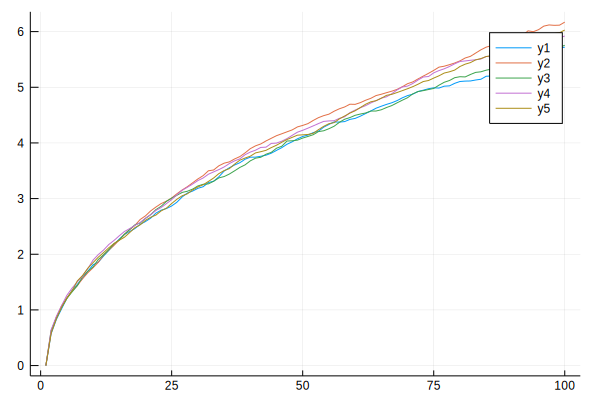

In [275]:
#iv hazlo con desv estandar
desvi=zeros(100,5)
for i in 1:5
   desvi[:,i]=desviaciones(caminatasp(zeros(1000),100,0.1))#varianza al tiempo t=40
end
plot(desvi[:,1])
plot!(desvi[:,2])
plot!(desvi[:,3])
plot!(desvi[:,4])
plot!(desvi[:,5])

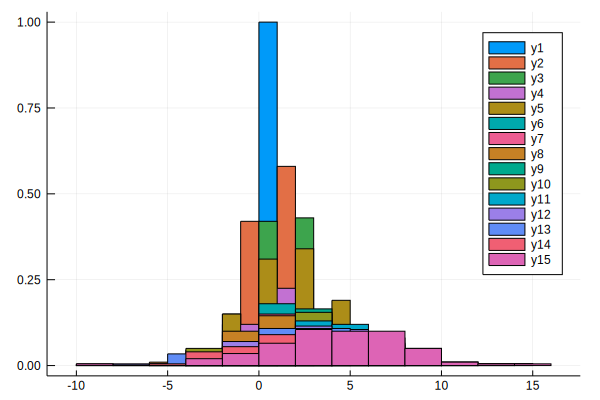

In [278]:
#4ii
histogram(caminatasp(zeros(100),15,0.4),normalize=true, legend=true)
#observamos que el histograma estara cargado dependiendo de la probabilidad
#hacia el lado derecho o izq